# 岭回归模型
岭回归是一种线性回归的正则化方法，通过引入 L2 正则化项 来防止过拟合，适用于：
    特征数较多（高维数据）
    特征间存在多重共线性（相关性较强）
    数据噪声较大
1. 岭估计
    当X之间存在多重共线性关系时，也就是|X'X|≈0，设想给X'X加上一个正常数矩阵(正定矩阵) kI(k>0),那么(X'X+kI)接近奇异(行列式为0)的可能性比X'X接近奇异的可能性小得多,用
    (估计)β(k) = (X'X+kI)^-1 X'Y作为β的估计比用最小二乘法估计跟稳定
2. 岭参数k的选择
    1. 岭迹法
    观察岭迹曲线，原则上应该选取(估计)β(k)稳定的最小k值，同时残差平方和也不增加太多
    2. 均方误差法
    岭估计的均方误差是k的函数，可以证明它能在某处取得最小值。记算并观察均方误差，开始它将下降，到达最小值后开始上升。取他最小值处的k作为岭参数

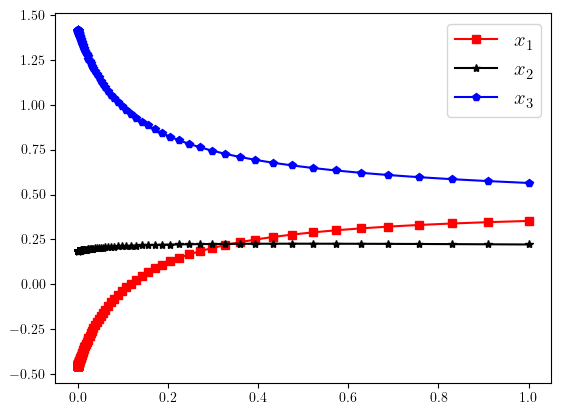

最优α= 0.001788649529057435
回归系数： [-0.44177495  0.18619826  1.40098861]
截距项: -4.856691233347658e-16
原始数据的截距项和回归系数为: [np.float64(-8.647103787292679), array([-0.0719225 ,  0.51297672,  0.30849576])]
拟合优度为: 0.9957090793021439


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from scipy.stats import zscore

plt.rc('text', usetex=True)
a = np.loadtxt('Pdata12_3.txt')
n = a.shape[1]-1  #表示矩阵 a 的列数（第 2 个维度）——表示自变量的总个数
aa = zscore(a)  #数据标准化
"""
zscore 是统计学和机器学习中常用的 数据标准化（Z-Score Normalization） 方法，通常用于将数据转换为均值为 0、标准差为 1 的标准正态分布形式。
    使用场景
        机器学习：在训练模型前标准化数据，避免某些特征因量纲不同而主导模型（如 SVM、KNN、PCA 等）。
        统计分析：比较不同量纲的变量（如身高和体重）。
        数据可视化：使不同变量的尺度一致，便于可视化。
"""
x = aa[:,:n]
y = aa[:,n]  #提出自变量和因变量观测值矩阵
b = []  #用于存储回归系数的空列表
kk = np.logspace(-4,0,100)  #循环迭代的不同k值
"""
np.logspace() 是 NumPy 提供的一个函数，用于生成在对数尺度上均匀间隔的数值序列。
np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
    start: 对数尺度的起始指数（10 的幂次）。
    stop: 对数尺度的结束指数（10 的幂次）。
    num: 生成的样本数（默认 50）。
    endpoint: 是否包含 stop（默认包含）。
    base: 对数的底数（默认 10）。
    dtype: 输出数组的数据类型。
"""
for k in kk:
    md = Ridge(alpha=k).fit(x,y)  #α（alpha）是正则化强度（超参数）。（越大，系数收缩越强）
    """
    alpha=k：设置正则化参数α
    alpha=0：退化为普通最小二乘法（OLS）。
    alpha→∞：所有回归系数趋近于 0。
    
    Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto')
     参数	                 作用	                                 示例
    alpha	          正则化强度（越大，系数收缩越强）	            alpha=0.1
    fit_intercept	  是否拟合截距项（默认 True）	               fit_intercept=False
    solver	          优化算法（auto、svd、cholesky、lsqr 等）	   solver='svd'
    normalize	      是否标准化数据（已弃用，改用 StandardScaler）	normalize=False
    
    输出结果：
    md.coef_：回归系数（权重），反映每个特征的重要性。
    md.intercept_：截距项（偏置）。
    md.predict(X_new)：对新数据 X_new 进行预测。
    """
    b.append(md.coef_)
# print(b)  
#绘图
st = ['s-r','*-k','p-b']  #下面画图的控制字符串
for i in range(3):
    plt.plot(kk,np.array(b)[:,i],st[i])
plt.legend(['$x_1$','$x_2$','$x_3$'], fontsize=15)
plt.show()

#自动获取最优值
mdcv = RidgeCV(alphas=np.logspace(-4,0,100)).fit(x,y)  #RidgeCV 是 Scikit-learn 提供的带交叉验证的岭回归，用于自动选择最优的正则化参数 参数：alpha.alphas（候选参数列表）作用：指定待搜索的 alpha 值列表。
"""
其他关键参数
参数	                                说明
cv	                    交叉验证折数（默认 None，用留一验证或 5 折）
scoring	                评估指标（默认 None，用负均方误差 neg_mean_squared_error）
fit_intercept	        是否拟合截距（默认 True）
store_cv_values	        是否存储交叉验证误差（默认 False，设为 True 可事后分析）

输出属性
属性	                    说明	                                                示例
alpha_	                选择的最佳 alpha 值	                                       mdcv.alpha_
coef_	                回归系数(对应最佳 alpha)                                   mdcv.coef_
intercept_	            截距项	                                                  mdcv.intercept_
cv_values_	            每个 alpha 的交叉验证误差（需 store_cv_values=True）	    mdcv.cv_values_

"""
print('最优α=', mdcv.alpha_)
md0 = Ridge(mdcv.alpha_).fit(x,y)  #使用交叉验证得到的最优 alpha 重新训练模型，提取标准化数据的回归系数。
cs0 = md0.coef_  #提出标准化数据的回归系数
print('回归系数：',cs0)
print('截距项:',md0.intercept_)
#记算所有指标的均值和标准差
mu = np.mean(a,axis=0)  #各列均值
s = np.std(a,axis=0,ddof=1)  #各列标准差（无偏估计）ddof=1：使用无偏标准差（分母 n-1，适用于样本数据）。

params = [mu[-1]-s[-1]*sum(cs0*mu[:-1]/s[:-1]),s[-1]*cs0/s[:-1]]  #-1 是 Python 的负索引，表示从数组的末尾开始取值
"""
mu[:-1]:数组 mu 中除最后一个元素外的所有元素(即自变量的均值μ_x1, μ_x2, μ_x3)
s[:-1]:数组 s 中除最后一个元素外的所有元素(即自变量的标准差σ_x1, σ_x2, σ_x3)
"""
print('原始数据的截距项和回归系数为:',params)
print('拟合优度为:', md0.score(x,y))